In [3]:
import pandas as pd
from prophet import Prophet
from pymongo import MongoClient


db = MongoClient('localhost', 27017)
collection = 'covid_county_formatted'
cursor = db.sustaindb[collection].find()
df = pd.DataFrame(list(cursor))

In [15]:
df = df[["date", "GISJOIN", "cases", "deaths"]]

all_gis_joins = df['GISJOIN'].unique()
print(f'#GISJOINs: {len(all_gis_joins)}')

df0 = df.loc[df['GISJOIN'] == all_gis_joins[0]]
df0 = df0.rename(columns = {
    'date': 'ds',
    'cases': 'y'
})
df0

#GISJOINs: 3116


,ds,GISJOIN,y,deaths
0,2020-01-24,G1700310,1,0.0
4,2020-01-25,G1700310,1,0.0
10,2020-01-26,G1700310,1,0.0
14,2020-01-27,G1700310,1,0.0
20,2020-01-28,G1700310,1,0.0
...,...,...,...,...
1049858,2021-03-03,G1700310,476094,9961.0
1052998,2021-03-04,G1700310,476835,9972.0
1056135,2021-03-05,G1700310,477381,9983.0
1059276,2021-03-06,G1700310,478498,10002.0


In [21]:
model = Prophet(
    interval_width=0.95,
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
)

# model.fit(df0)
m = Prophet()
m.fit(df0)
df0_future = m.make_future_dataframe(periods=365)
df0_forecast = m.predict(df0_future)
df0_forecast

df0_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-24,-3.788716e+02,-6081.674785,5.136937e+03
1,2020-01-25,-3.489205e+02,-5821.565423,5.653594e+03
2,2020-01-26,-4.314203e+02,-6053.387138,4.768354e+03
3,2020-01-27,-3.570753e+02,-6156.891410,5.356323e+03
4,2020-01-28,-5.310109e+02,-6143.675111,5.062945e+03
...,...,...,...,...
769,2022-03-03,1.054235e+06,480303.276106,1.598604e+06
770,2022-03-04,1.055931e+06,477495.746658,1.608785e+06
771,2022-03-05,1.057490e+06,475174.681684,1.610245e+06
772,2022-03-06,1.058936e+06,478090.358357,1.614310e+06


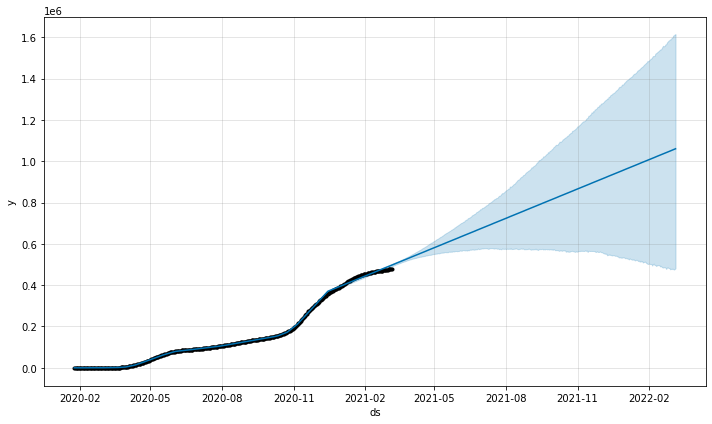

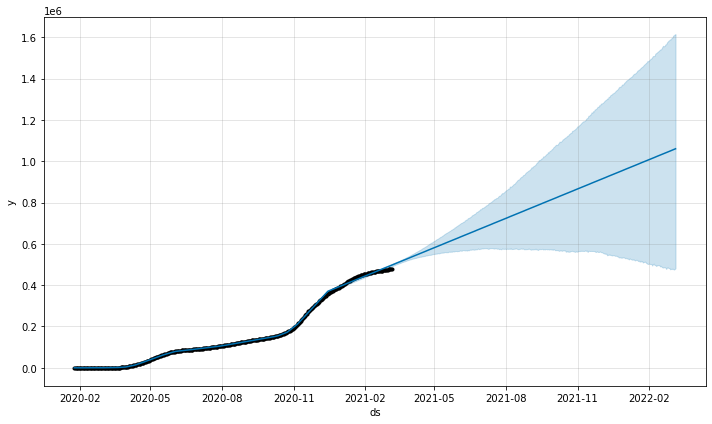

In [22]:
m.plot(df0_forecast)